<span style = "color: #aa1f25; font-size:24px"> 
 Final Project:<br>
 Group 27 <br><br></span>
<span style="color: #aa1f25; font-size:24px"><b>Emotional Behavior Of Children After October 7th</b></span><br><br>


<span style = "color: #aa1f25; font-size:20px">
Students Names: <br></span>

<span style = "color: #aa1f25; font-size:17px">
Shaked Turgeman<br>
Michal Isaacs<br>
Michal Arzi<br><br> </span>


<img src= "https://raw.githubusercontent.com/shaked-t/oct7/d5f973dd0d7ad6de1a5ded7b9919cd482d8aa6e0/%D7%9B%D7%95%D7%AA%D7%A8%D7%AA.jpg" width="100%"/>
<div> 

<hr style="border: 1px solid black;">

# <span style = "color: #aa1f25; font-size:24px"> Imports </span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = "C:\\Users\\shake\\OneDrive - Ariel University\\מבוא לניתוח נתונים\\פרוייקט\\סופי התנהגות רגשית ילדים חרבות ברזל.csv"
df_oct7 = pd.read_csv(file_path,  encoding = 'utf-8')
df_oct7 = df_oct7.dropna(axis=1, how='all') #cleaning the data
df_oct7.dropna(axis=0, how='all', inplace=True)
df_oct7 = df_oct7.iloc[0:165,:]

In [3]:
custom_palette = sns.color_palette("Paired")

<hr style="border: 1px solid black;">

# <span style = "color: #aa1f25; font-size:24px"> Data cleaning </span>

turning the gender column to binary:

In [4]:
df_oct7['A4'] = df_oct7['A4'].replace({'זכר': 1, 'נקבה': 0, 'זכר, נקבה' : 1})

In [5]:
df_oct7['A5'] = pd.to_datetime(df_oct7['A5'], format='%d/%m/%Y', errors='coerce')
df_oct7['A5'] = pd.to_datetime(df_oct7['A5'], format='%m/%d/%Y', errors='coerce')
current_date = pd.to_datetime('today')
df_oct7['age'] = current_date.year - df_oct7['A5'].dt.year

We replaced each Hebrew word with the corresponding number from the translation.

In [6]:
df_oct7['A7'] = df_oct7['A7'].replace({'ראשון':1, 'שני':2, 'שלישי':3, 'רביעי':4, 'חמישי':5, 'שלישי, רביעי':3})
numeric_values = pd.to_numeric(df_oct7['A7'], errors='coerce')
mean_value = numeric_values.mean()
df_oct7['A7'] = df_oct7['A7'].replace('אחר', mean_value).astype(int)

We standardized the names of places that were written differently to see the distribution of locations for the participants:

In [7]:
df_oct7['A9'] = df_oct7['A9'].replace({'tel aviv': 'תל אביב',
                            'פתח תקוה' : 'פתח תקווה',
                            'שכונת אברמוביץ, ראשון לציון' : 'ראשון לציון',
                            'צור יגאל כוכב יאיר' : 'צור יגאל',
                            'כוכב יאיר- צור יגאל' : 'צור יגאל',
                            'מקוה ישראל חולון' : 'חולון',
                            'נתניה-ותיקים' : 'נתניה',
                            'נתניה רחוב רזיאל' : 'נתניה',
                            'עיר במרכז הארץ' : 'מרכז',
                            'ישראל נתניה' : 'נתניה',
                             'שכונת אברמוביץ, ראשון לציון' : 'ראשון לציון'
                            })
df_oct7['A9'] = df_oct7['A9'].str.lower().str.strip()

In the following three actions, we changed the words to numbers in sequence, so we can see how they are divided in the data and also check their matches and correlations with other variables:

In [8]:
df_oct7['A12'] = df_oct7['A12'].replace({'נשוי/ה' : 1, 'גרוש/ה' : 2, 'רווק/ה' : 3})

In [9]:
df_oct7['A13'] = df_oct7['A13'].replace({'חילוני': 1, 'מסורתי': 2, 'דתי': 3, 'חרדי': 4, 'חילוני, מסורתי': 5, 'מסורתי, דתי': 5, 'דתי, חרדי': 5 })
df_oct7['A13'] = df_oct7['A13'].astype(int)

In [10]:
df_oct7['A22'] = df_oct7['A22'].replace({
            'אני (ממלא השאלון)' : 1,
            'בן/בת זוגי' : 2,
            'בן משפחה קרוב מגויס (ילדים, הורים, אחים)' : 3,
            'אף אחד מבני משפחתי הקרובה אינו מגוייס' : 4})

In [11]:
df_oct7['A20'] = df_oct7['A20'].replace({'לא עובד/ת':'0%',
                               'לא עובד/ת, חופשה ללא תשלום':'0%',
                               'חופשה ללא תשלום':'0%',
                               '75%, 100%':'75%',
                               'יותר מ100%':'more than 100%'})

df_oct7['A21'] = df_oct7['A21'].replace({'לא עובד/ת':'0%',
                               'לא עובד/ת, חופשה ללא תשלום':'0%',
                               'חופשה ללא תשלום':'0%',
                               '100%, יותר מ100%':'more than 100%',
                               'יותר מ100%':'more than 100%'})
df_oct7['A29'] = df_oct7['A29'].replace({'לא עובד/ת':'0%',
                               'לא עובד/ת, חופשה ללא תשלום':'0%',
                               'חופשה ללא תשלום':'0%',
                               '75%, 100%':'75%',
                               'יותר מ100%':'more than 100%'})
df_oct7['A30'] = df_oct7['A30'].replace({'לא עובד/ת':'0%',
                               'לא עובד/ת, חופשה ללא תשלום':'0%',
                               'חופשה ללא תשלום':'0%',
                               'לא עובד/ת, יותר מ100%':'more than 100%',
                               '100%, יותר מ100%':'more than 100%',
                               'יותר מ100%':'more than 100%'})

We arranged the column according to its correct numbers:

In [12]:
columns_to_modify_1_4_2 = ['A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55',  'A56', 'A57', 'A58', 'A59','A60', 'A61', 'A62', 'A63', 'A64', 'A65', 'A66',  'A67', 'A68', 'A69', 'A70']  # Replace with your column names

replacement_dict1 = {'אף פעם לא': 1, 'לפעמים': 2, 'לעיתים קרובות': 3, 'כמעט תמיד': 4,
                    '0' : 1, '1' : 2, '2' : 3, '3' : 4}
for column in columns_to_modify_1_4_2:
    df_oct7[column] = df_oct7[column].replace(replacement_dict1)
df_oct7[columns_to_modify_1_4_2] = df_oct7[columns_to_modify_1_4_2].astype(int)

In [13]:
columns_to_modify_1_7 = ['A71', 'A72', 'A73', 'A74','A75', 'A76', 'A77', 'A78', 'A79', 'A80']

replacement_dict = {
    'מאוד לא מסכים 1': 1,
    'ניטרלי 4': 4,
    'מאוד מסכים 7': 7
}
for column in columns_to_modify_1_7:
    df_oct7[column] = df_oct7[column].replace(replacement_dict)
df_oct7[columns_to_modify_1_7] = df_oct7[columns_to_modify_1_7].astype(int)

Converted words to numbers:

In [14]:
columns_to_int = ['A6', 'A15', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A90', 'A91', 'A92', 'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99', 'A100']
df_oct7[columns_to_int] = df_oct7[columns_to_int].astype(int, errors='ignore')
columns_from_float = ['A17', 'A23', 'A26']
df_oct7[columns_from_float] = df_oct7[columns_from_float].replace('', np.nan).fillna(0).astype(float).astype(int)

We made the "yes" and "no" columns into binary

In [15]:
def Binary(val):
    if val == '1' or val == 'לא':
        return 1
    elif val == '2' or val == 'כן':
        return 0

df_oct7['A101'] = df_oct7['A101'].apply(Binary)
df_oct7['A102'] = df_oct7['A102'].apply(Binary)

We arranged the column according to its correct numbers:

In [16]:
columns_to_modify_1_4 = ['A103','A104','A105','A106','A108']
replacement_dict2 = {'1. אף פעם לא' :1, '2. לפעמים':2, '3. לעיתים קרובות':3, '4. כמעט תמיד':4}
for column in columns_to_modify_1_4:
    df_oct7[column] = df_oct7[column].replace(replacement_dict2)
df_oct7[columns_to_modify_1_4] = df_oct7[columns_to_modify_1_4].astype(int)

We changed the words to numbers in sequence, so we can see how they are divided in the data and also check their matches and correlations with other variables:

In [17]:
columns_to_modify_news = ['A112']
replacement_dict3 = {'לא מתעדכן/ת בכלל':1,
                     'מתעדכן/ת פעם ביום':2,
                     'מתעדכן/ת מספר פעמים ביום':3,
                     'צמוד/ה לחדשות (טלוויזיה, רשתות חברתיות, רדיו)':4}
for column in columns_to_modify_news:
    df_oct7[column] = df_oct7[column].replace(replacement_dict3)
df_oct7[columns_to_modify_news] = df_oct7[columns_to_modify_news].astype(int)

Organized differently written words under the same header to see the distribution of job types in the data:

In [18]:
df_oct7['A28'] = df_oct7['A28'].replace({'Hi-tech' : 'הייטק',
                               'אבטחת מידע בכללית' : 'הייטק',
                               'אבטחת מידע' : 'הייטק',
                               'איש סיסטם' : 'הייטק',
                               'בודק תוכנה' : 'הייטק',
                               'הייטק ' : 'הייטק',
                               'מתכנת' : 'הייטק',
                               'היי טק' : 'הייטק',
                               'מנתח נתונים -הייטק' : 'הייטק',
                               'מנתח מערכות ' : 'הייטק',
                               'סייבר' : 'הייטק',
                               'חומרה' : 'הייטק',
                               'מחשבים' : 'הייטק',
                               'מהנדס ראשי של אוסם' : 'הנדסה',
                               'הנדסה אזרחית' : 'הנדסה',
                               'מהנדס מכונות' : 'הנדסה',
                               'הנדסאי בניין' : 'הנדסה',
                               'הנדסאי' : 'הנדסה',
                               'מהנדס Bi' : 'הנדסה',
                               'חברת הנדסת כבישים' : 'הנדסה',
                               'הנדסה' : 'הנדסה',
                               'הנדסאי נוף' : 'הנדסה',
                               'מהנדס תוכנה' : 'הנדסה',
                               'מהנדס תוכנה ' : 'הנדסה',
                               'מנהל אבטחה' : 'ניהול',
                               'מנהל תיקי לקוחות' : 'ניהול',
                               'מנהל מכירות' : 'ניהול',
                               'מנהל מוצר ' : 'ניהול',
                               'מנהל בתחום החינוך' : 'ניהול',
                               'מנהל לוגיסטיקה' : 'ניהול',
                               'מנהל פיתוח תוכנה ' : 'ניהול',
                               'מנהל תפועל ' : 'ניהול',
                               'מנהל ' : 'ניהול',        
                               'מנהל השקעות' : 'ניהול',
                               'מנהלת מחלקת שומה בעיירית חולון ' : 'ניהול',
                               'מנהל מפעל' : 'ניהול',
                               'סמכל תפעול' : 'סמנכל',
                               'סמנכ"ל כספים- רואה חשבון' : 'סמנכל',
                               'סמנכלית עמותה חינוכית' : 'סמנכל',
                               'סמנכל בחברה לפתרונות ניקיון' : 'סמנכל',
                               'סמנכל פיתוח עסקי' : 'סמנכל',
                               'סמנכ"לית שיווק' : 'סמנכל',
                               'מנכל תאגיד' : 'מנכל',
                               'מנכל חברת תוכנה' : 'מנכל',
                               'מנכ"ל' : 'מנכל',
                               'משווק, עצמאי' : 'עצמאי',
                               'עצמאי בתחום ההיטק' : 'עצמאי',
                               'אברך וסטודנט' : 'אקדמאי',
                               'מאצה וחוקר באוניברסיטה' : 'אקדמאי',
                               'מתרגל באוניברסיטה ' : 'אקדמאי',
                               'סוכן מכירות ' : 'שירות',
                               'סוכן פנסיוני' : 'שירות',
                               'יועץ השקעות ומוזיקאי': 'שירות',
                               ' מכירות' : 'שירות',
                               'פקיד ' : 'שירות',
                               'מכירות' : 'שירות',
                               'שרות לקוחות' : 'שירות',
                               'יועץ כלכלי' : 'שירות',
                               'שרות לקוחות' : 'שירות',
                               'יועץ כלכלי' : 'שירות',
                               'בנק הפועלים' : 'בנק',
                               'בנקאות' : 'בנק',
                               'חברת ניקיון' : 'נקיון',
                               'נהג משאית' : 'נהג',
                               'נהג מונית' : 'נהג',
                               'קלניאית תקשורת' : 'קלינאית תקשורת',
                               'אדריכל גינות' : 'אדריכל',
                               'טכנאי שירות' : 'טכנאי',
                               'עורכת דין' : 'עריכת דין',
                               'עורך דין' : 'עריכת דין',
                               'מפיק מרוצי ריצה' : 'מפיק אירועים',
                               'מפיקת אירועים וכנסים' : 'מפיק אירועים',
                               'מעצבת פנים ' : 'עיצוב',
                               'צהרון - עסק משפחתי ' : 'חינוך',
                               'גננת' : 'חינוך',
                               'מאמן כדורגל ומנעולן רכב' : 'מאמן כושר',
                               'שמאי רכב' : 'מוסך',
                               'ניהול פרויקטים' : 'פרוייקטור' })                     

df_oct7['A19'] = df_oct7['A19'].replace({'מתכנתת' : 'הייטק',
                               'מערכות מידע' : 'הייטק',
                               'אינטל' : 'הייטק',
                               'Iai' : 'הייטק',
                               'מתכנתת' : 'הייטק',
                               'מהנדסת תוכנה ' : 'הייטק',
                               'מתכנת' : 'הייטק',
                               'מתכנתת ' : 'הייטק',
                               'אחראית פיתוח טכנולוגי באגף' : 'הייטק',
                               'מהנדסת תוכנה' : 'הייטק',
                               'הנדסה אזרחית' : 'הנדסה',
                               'מהנדסת תוכנה ' : 'הנדסה',
                               'ניהול מתנדבים' : 'ניהול',
                               'ניהול בהייטק' : 'ניהול',
                               'מנהלת מכירות' : 'ניהול',
                               'מנהלת איכות' : 'ניהול',
                               'מנהלת תפי בחברת תרופות ' : 'ניהול',
                               'מנהלת אגף מטה ואסטרטגיה ארגונית' : 'ניהול',
                               'מנהל סניף' : 'ניהול',
                               'מנהל קצבייה' : 'ניהול',
                               'מנהלת' : 'ניהול',
                               'מנהלת שיווק' : 'ניהול',
                               'מנהלת פריקטים באמנור קיסריה' : 'ניהול',
                               'מנהלת מחלקה בחברת דרכים' : 'ניהול',
                               'ניהול ' : 'ניהול',
                               'מנהלת מרכז למידה' : 'ניהול',
                               'ניהול השקעות' : 'ניהול',
                               'ניהול פרויקטים בהייטק' : 'ניהול',
                               'מנהלת מוצר' : 'ניהול',
                               'מנהלת מערך דיור מוגן' : 'ניהול',
                               'מנהלת הבטחת איכות פארמה' : 'ניהול',
                               'מנהלת הייטק' : 'ניהול',
                               'מנהלת אתר' : 'ניהול',
                               'מנהלת חשבונות ' : 'ניהול',
                               'מנהלת ' : 'ניהול',
                               'ניהול השקעות' : 'ניהול',
                               'אדמינסטרציה במשרד העוסק קניין רוחני' : 'ניהול',
                               'עצמאית ' : 'עצמאי',
                               'בעל עסק' : 'עצמאי',
                               'מניקור' : 'עצמאי',
                               'דיאטנית' : 'עצמאי',
                               'מקעקעת עצמאית ' : 'עצמאי',
                               'עצמאית' : 'עצמאי',
                               'צורפת' : 'עצמאי',
                               'קוסמטיקאית' : 'עצמאי',
                               'אקדמיה בתחום החינוך ' : 'אקדמאי',
                               'חברת סגל באוניברסיטה' : 'אקדמאי',
                               'חוקרת ' : 'אקדמאי',
                               'איקאה ' : 'שירות',
                               'שירות לקוחות' : 'שירות',
                               'ישראכרט' : 'שירות',
                               'ייעוץ פיננסי ' : 'שירות',
                               'חברת ביטוח בריאות' : 'שירות',
                               'משרד' : 'שירות',
                               'יועצת ארגונית' : 'שירות',
                               'רכזת גיוס בחברת שטראוס ' : 'שירות',
                               'בנקאית' : 'בנק',
                               'בנקאות ' : 'בנק',
                               'בנקאות' : 'בנק',
                               'בנקאית בבנק' : 'בנק',
                               'עובד בנק' : 'בנק',
                               'בנק הפועלים' : 'בנק',
                               'גננת משרד החינוך ' : 'חינוך',
                               'גננת' : 'חינוך',
                               'גננת ' : 'חינוך',
                               'מורה' : 'חינוך',
                               'מורה ' : 'חינוך',
                               'מטפלת חינוך מיוחד' : 'חינוך',
                               'מטפלת ילדים' : 'חינוך',
                               'משרד החינוך' : 'חינוך',
                               'מורה בתיכון' : 'חינוך',
                               'סייעת חינוכית' : 'חינוך',
                               'מובילת גן' : 'חינוך',
                               'גננת ומדריכה פדגוגית בצהרוני הילדים' : 'חינוך',
                               'מנהלת גן' : 'חינוך',
                               'בעלת צהרון גננת לגיל הרך' : 'חינוך',
                               'הוראה' : 'חינוך',
                               'לוקחת דמים' : 'רפואה',
                               'אחות' : 'רפואה',
                               'רוקחת' : 'רפואה',
                               'שיננית ' : 'רפואה',
                               'רופאה' : 'רפואה',
                               'Hr' : 'משאבי אנוש',
                               'משרד עוד' : 'עריכת דין',
                               'עורכת דין' : 'עריכת דין',
                               'עו״ד' : 'עריכת דין',
                               'עוד' : 'עריכת דין',
                               'חופשת לידה' : 'לא עובדת',
                               'עקרת בית' : 'לא עובדת',
                               'בבית' : 'לא עובדת',
                               'כרגע לא' : 'לא עובדת',
                               'מובטלת' : 'לא עובדת',
                               'מעצבת פנים' : 'עיצוב',
                               'עיצוב יופי' : 'עיצוב',
                               'עיצוב ' : 'עיצוב',
                               'עיצוב פנים' : 'עיצוב',
                               'מעצבת גרפית' : 'עיצוב',
                               'מעצבת פנים ' : 'עיצוב',
                               'פקידה' : 'מזכירה',
                               'מזכירה.' : 'מזכירה',
                               'פקידה ' : 'מזכירה',
                               'מזכירות חטיבתית במשרד ממשלתי' : 'מזכירה',
                               'מזכירה רפואית' : 'מזכירה',
                               'מזכירה רפואית ' : 'מזכירה',
                               'עוזרת אישית ' : 'מזכירה',
                               'עו"ס ' : 'עובדת סוציאלית ',
                               'עיצוב שיער' : 'ספרית',
                               'הנהלת חשבונות' : 'כלכלה',
                               'כלכלן' : 'כלכלה',
                               'שוק ההון' : 'כלכלה',
                               'מתכנן פיננסי ' : 'כלכלה',
                               'עמותת מטב - חשבת שכר וכו..' : 'כלכלה',
                               'משווקת דיגיטלית ' : 'שיווק',
                               'פס' : 'פסיכולוג' })

<hr style="border: 1px solid black;">

# <span style = "color: #aa1f25; font-size:24px"> Getting to know the data </span>

In [19]:
df_oct7.shape

(165, 113)

In [20]:
df_oct7.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A104,A105,A106,A107,A108,A109,A110,A111,A112,age
0,11/30/2023 18:20:19,משתתף מס 3,28/11/2023,0,2018-12-29,4,4,ממלכתי-דתי,בת ים,בגן/בית ספר הקבוע שלו,...,2,2,3,פשוט מדברים על זה,3,לא,שיגרתי ככל שניתן,יוגה. נשימות נדיפות. מוזיקה משמחת,3,6
1,11/28/2023 10:07:30,57-64,28/11/2023,0,2018-10-10,2,1,ממלכתי,כפר סבא,בגן/בית ספר הקבוע שלו,...,3,2,3,"מציעה לה לחשוב על דברים חיובים שקרו, מסבירה אי...",2,בתקופה שלא היה גן היה קשה לה להירדם אבל כשחזר ...,מנסים לייצר שיגרה כמה שניתן. לא רואים חדשות בנ...,"מוזיקה, ספורט, מחשבות חיוביות",2,6
2,11/28/2023 16:07:40,57-64,28/11/2023,0,2018-06-18,3,1,ממלכתי,כפר סבא,בגן/בית ספר הקבוע שלו,...,4,1,4,חיבוק,1,לא,שומרים שגרה,חיבוקים מוזיקה ריקודים בבית,3,6
3,11/28/2023 10:32:48,11111,28/11/2023,1,2017-02-19,3,1,ממלכתי,כפר סבא,בגן/בית ספר הקבוע שלו,...,3,3,4,חיבוק והסבר,2,כן - האמצעי ממש מתבכיין ורוצה הרבה שירימו אותו...,רגועה ונעימה סהכ,מחשבה על הילדים. ההורין נשארים רגועים וזה עובר...,3,7
4,11/29/2023 12:06:35,137,29/11/2023,0,2019-11-16,3,3,ממלכתי,נתניה,בגן/בית ספר הקבוע שלו,...,4,1,3,"חיבוק, הכלה, שיחה להבין את תחושותיה. הכל תוך כ...",1,לא חלה רגרסיה.,מתנהלים מול הילדים כרגיל והאווירה טובה ורגועה....,"מדיטציה, מוסיקה, ריפוי בעיסוק",2,5


In [21]:
grouped_df = df_oct7.groupby("A4")["A4"].count().reset_index(name='counts')
grouped_df['A4'] = grouped_df['A4'].replace({0: 'girl', 1: 'boy'})
grouped_df

,A4,counts
0,girl,101
1,boy,64


A4 is the gender column

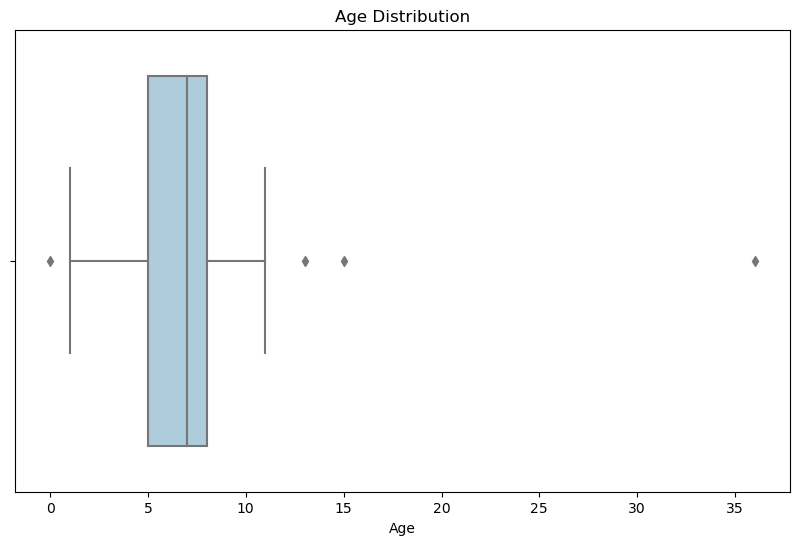

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_oct7['age'], palette=custom_palette)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

We found unusual ages, so we decided to convert them to midian values

In [23]:
df_oct7['age'].unique()

array([ 6,  7,  5,  4,  8,  1, 36,  9,  3,  0,  2, 11, 10, 15, 13])

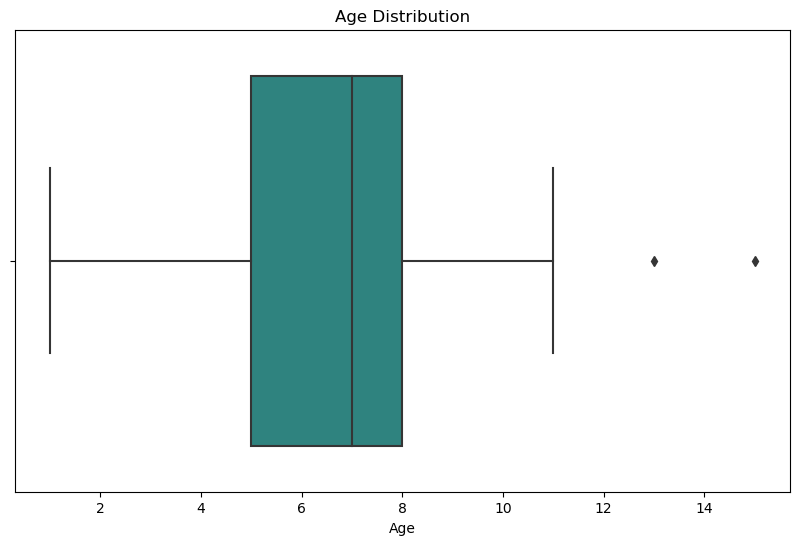

In [24]:
median_age = df_oct7.loc[~df_oct7['age'].isin([0, 36]), 'age'].median()
df_oct7['age'] = df_oct7['age'].replace([0, 36], median_age)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_oct7['age'], palette='viridis')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

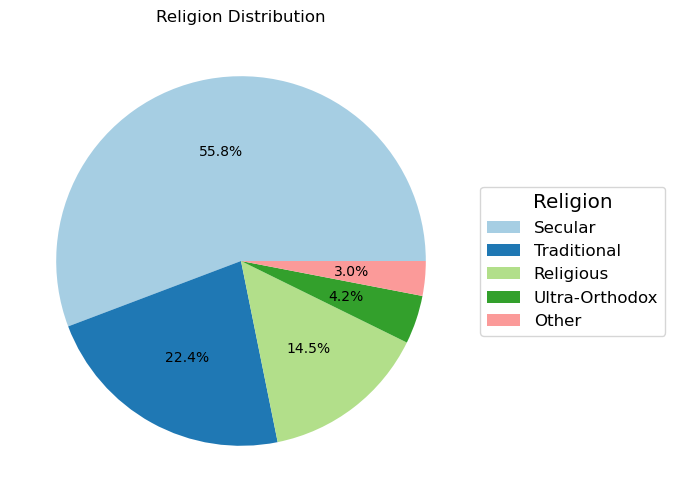

In [25]:
Religion_grouped = df_oct7['A13'].value_counts()
Religion_grouped.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=custom_palette, labels=['']*5)
plt.ylabel('')
plt.title('Religion Distribution')
plt.legend(labels=['Secular', 'Traditional', 'Religious', 'Ultra-Orthodox', 'Other'], loc = 'center left', bbox_to_anchor = (1, 0.5), fontsize = 'large', title = 'Religion', title_fontsize = 'x-large')
plt.show()

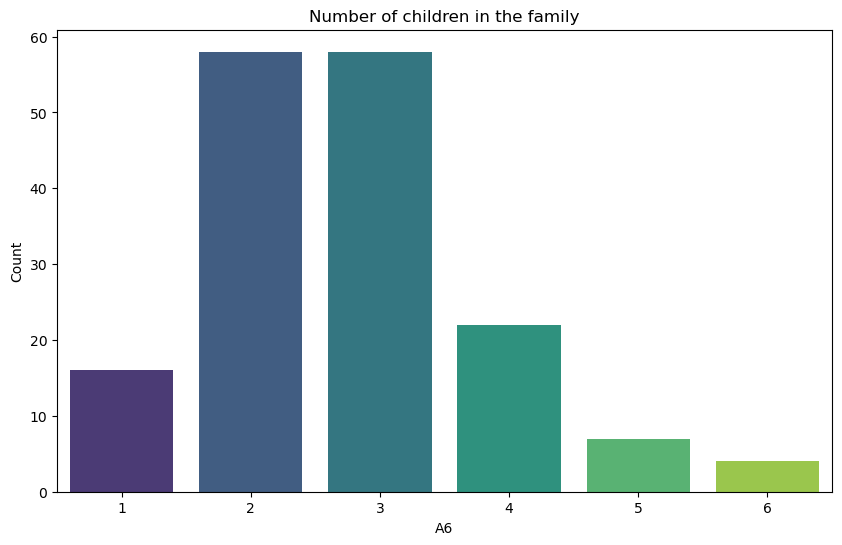

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_oct7, x='A6', palette='viridis')
plt.title('Number of children in the family')
plt.xlabel('A6')
plt.ylabel('Count')
plt.show()

 <hr style="border: 1px solid black;">

# <span style = "color: #aa1f25; font-size:18px"> Conclusion 1: </span>

<img src= "https://github.com/shaked-t/oct7/blob/main/%D7%9E%D7%A1%D7%A7%D7%A0%D7%941.jpg?raw=true" width="1200"/>


In [52]:
df_oct7['change in work p1'] = df_oct7['A20'] != df_oct7['A21']
df_oct7['change in work p2'] = df_oct7['A29'] != df_oct7['A30']

In [53]:
df_oct7['mother_work_change'] = df_oct7.apply(lambda row: 'mother work changed' if ((row['A14'] == 'אמא') and row['change in work p1'] == True) or ((row['A24'] == 'נקבה') and row['change in work p2'] == True) else 'mother work no change', axis=1)
df_oct7['father_work_change'] = df_oct7.apply(lambda row: 'father work changed' if ((row['A14'] == 'אבא') and row['change in work p1'] == True) or ((row['A24'] == 'זכר') and row['change in work p2'] == True) else 'father work no change', axis=1)

df_oct7[['A14', 'A24', 'change in work p1', 'change in work p2', 'mother_work_change', 'father_work_change']].head()

,A14,A24,change in work p1,change in work p2,mother_work_change,father_work_change
0,אמא,זכר,False,False,mother work no change,father work no change
1,אמא,זכר,False,False,mother work no change,father work no change
2,אמא,זכר,True,False,mother work changed,father work no change
3,אמא,זכר,False,False,mother work no change,father work no change
4,אמא,זכר,True,False,mother work changed,father work no change


In [29]:
df_oct7.groupby(['mother_work_change']).size().reset_index(name='count')

,mother_work_change,count
0,mother work changed,49
1,mother work no change,116


In [30]:
df_oct7.groupby(['father_work_change']).size().reset_index(name='count')

,father_work_change,count
0,father work changed,61
1,father work no change,104


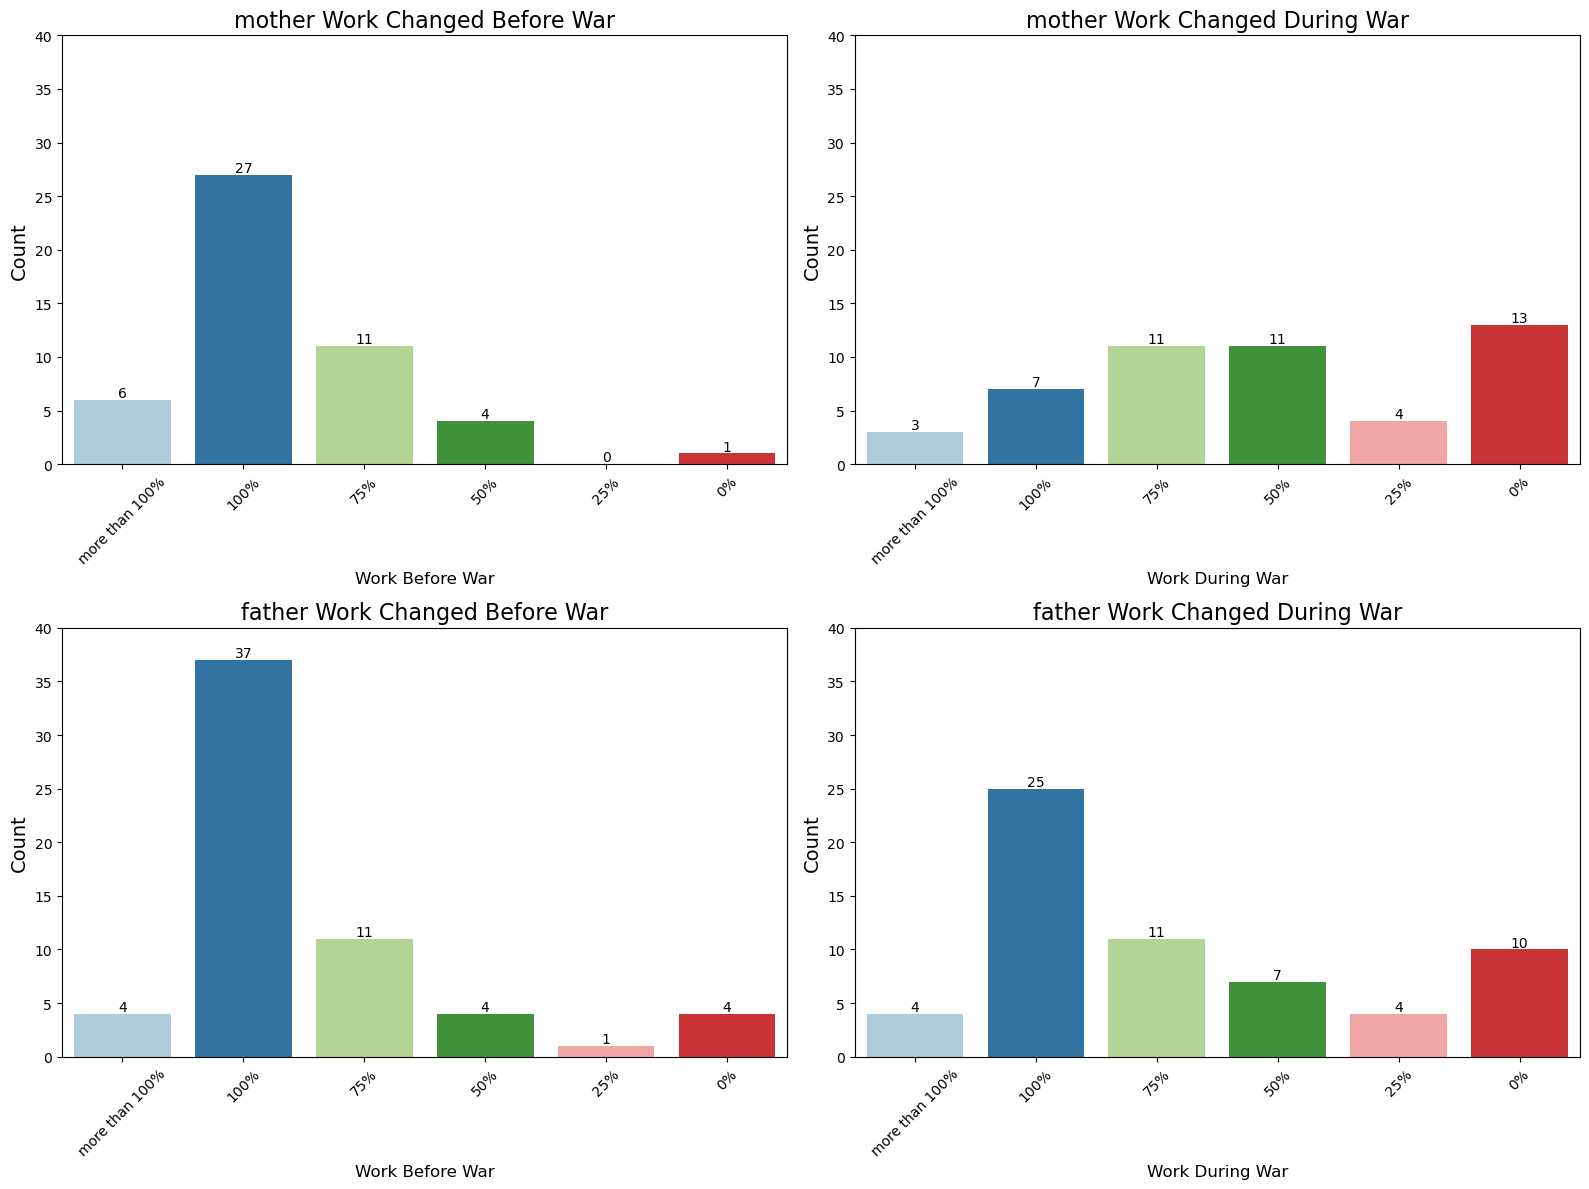

In [31]:
category_order = ['more than 100%', '100%', '75%', '50%', '25%', '0%']

def plot_work_change(data, title, ax1, ax2):
    y_max = 40
    sns.countplot(x = 'A21', data = data, ax = ax1, order = category_order, palette = custom_palette)
    ax1.set_xlabel('Work Before War', fontsize = 12)
    ax1.set_ylabel('Count', fontsize = 14)
    ax1.set_title(f'{title} Before War', fontsize = 16)
    ax1.tick_params(axis = 'x', rotation = 45, labelsize = 10)
    ax1.set_ylim(0, y_max)
    for p in ax1.patches:
        height = int(p.get_height())
        ax1.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha = 'center', va = 'center', fontsize = 10, color = 'black', xytext = (0, 5), textcoords = 'offset points')
    
    sns.countplot(x='A20', data=data, ax=ax2, order=category_order, palette=custom_palette)
    ax2.set_xlabel('Work During War', fontsize = 12)
    ax2.set_ylabel('Count', fontsize = 14)
    ax2.set_title(f'{title} During War', fontsize=16)
    ax2.tick_params(axis = 'x', rotation = 45, labelsize=10)
    ax2.set_ylim(0, y_max)
    for p in ax2.patches:
        height = int(p.get_height())
        ax2.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
plot_work_change(df_oct7[df_oct7['mother_work_change'] == 'mother work changed'], 'mother Work Changed', axes[0, 0], axes[0, 1])
plot_work_change(df_oct7[df_oct7['father_work_change'] == 'father work changed'], 'father Work Changed', axes[1, 0], axes[1, 1])
plt.tight_layout()
plt.show()

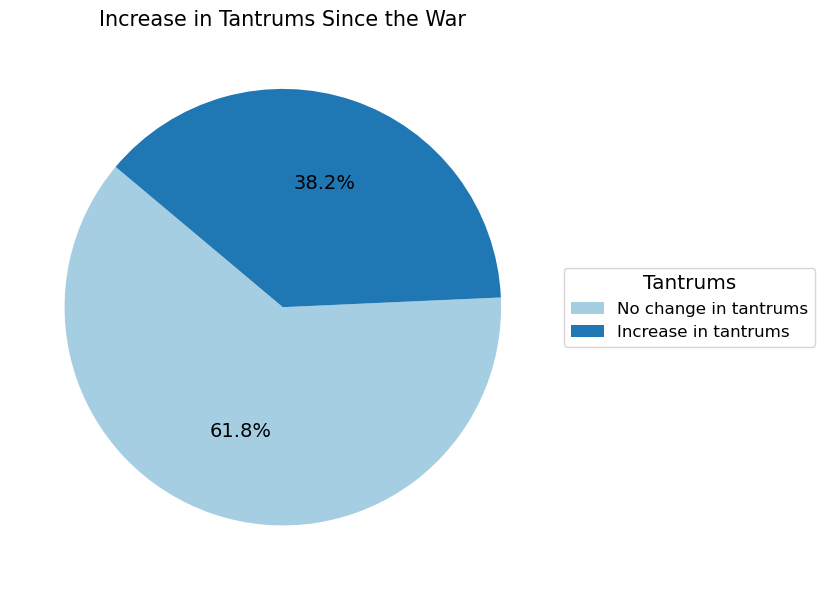

In [32]:
tantrums_count = df_oct7['A102'].value_counts()
plt.figure(figsize = (8, 6))  
plt.pie(tantrums_count, colors = custom_palette, autopct = '%1.1f%%', startangle = 140, textprops = {'fontsize': 14})
plt.title('Increase in Tantrums Since the War', fontsize = 15)
plt.legend(labels=['No change in tantrums', 'Increase in tantrums'], loc = 'center left', bbox_to_anchor = (1, 0.5), fontsize = 'large', title = 'Tantrums', title_fontsize = 'x-large')
plt.tight_layout()
plt.show()

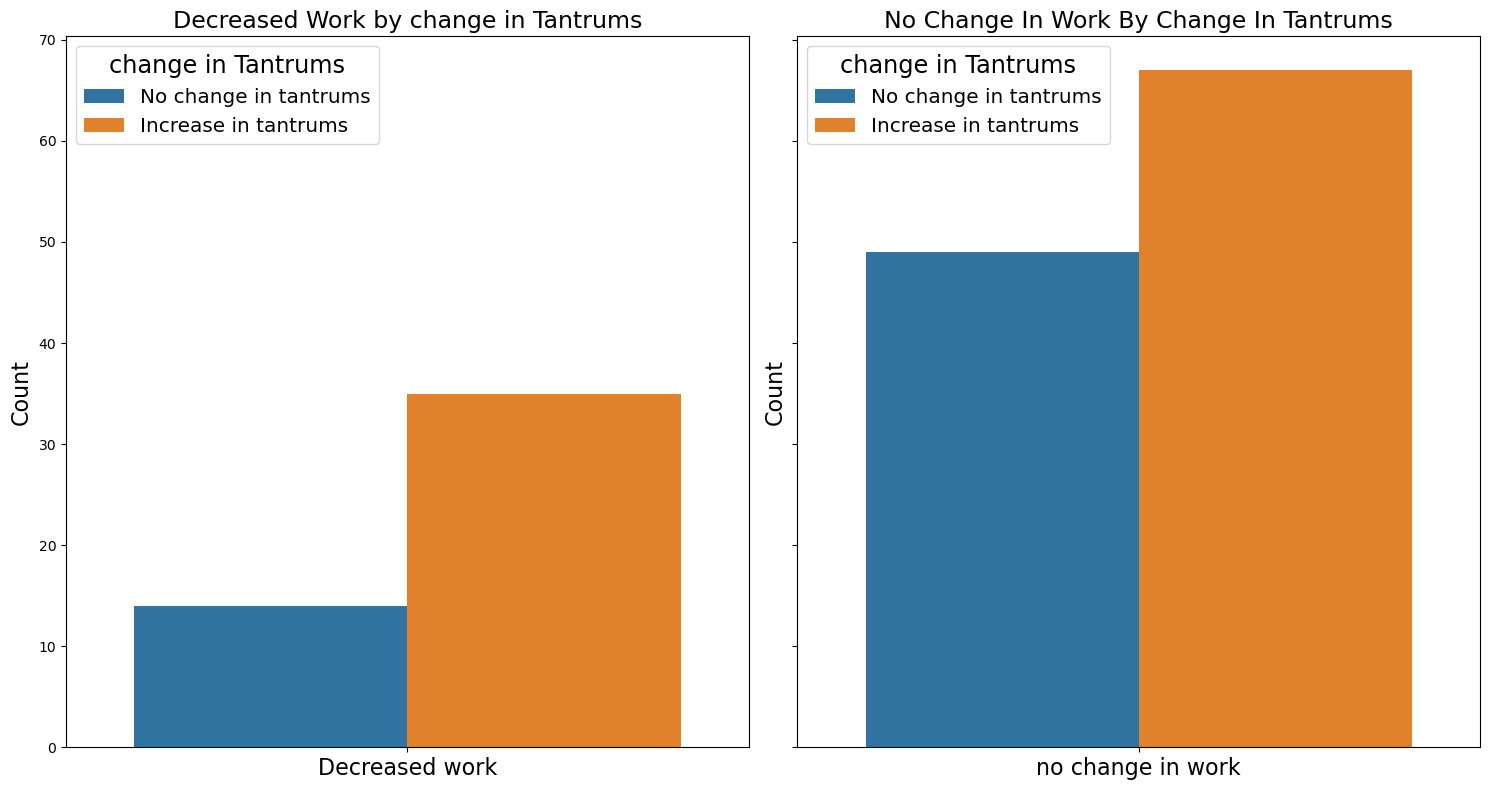

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

sns.countplot(ax=axes[0], x='mother_work_change', hue='A102', data=df_oct7[df_oct7['mother_work_change'] == 'mother work changed'])
axes[0].set_xlabel('')
axes[0].set_ylabel('Count', fontsize=16)
axes[0].set_title('Decreased Work by change in Tantrums', fontsize=17)
axes[0].legend(title='change in Tantrums', loc='upper left', labels=['No change in tantrums', 'Increase in tantrums'], fontsize='x-large', title_fontsize='xx-large')
axes[0].set_xticklabels(['Decreased work'], fontsize=16)

sns.countplot(ax=axes[1], x='mother_work_change', hue='A102', data=df_oct7[df_oct7['mother_work_change'] == 'mother work no change'])
axes[1].set_xlabel('')
axes[1].set_ylabel('Count', fontsize=16)
axes[1].set_title('No Change In Work By Change In Tantrums', fontsize=17)
axes[1].legend(title='change in Tantrums', loc='upper left', labels=['No change in tantrums', 'Increase in tantrums'], fontsize='x-large', title_fontsize='xx-large')
axes[1].set_xticklabels(['no change in work'], fontsize=16)

plt.tight_layout()
plt.show()

---

<span style = "color: #aa1f25; font-size:15px"> We can see that children of mothers who have decreased their work hours have fewer tantrums than those whose mothers have made no change </span>

<hr style="border: 1px solid black;">

# <span style = "color: #aa1f25; font-size:18px"> Conclusion 2: </span>

<img src= "https://github.com/shaked-t/oct7/blob/main/%D7%9E%D7%A1%D7%A7%D7%A0%D7%94%202.jpg?raw=true" width="1200"/>

we wanted to see if there is a guiding word in column A107 (hoe a parent helps his child calmn down)

In [137]:
df_oct7['A107'].unique

<bound method Series.unique of 0                                     פשוט מדברים על זה 
1      מציעה לה לחשוב על דברים חיובים שקרו, מסבירה אי...
2                                                  חיבוק
3                                            חיבוק והסבר
4      חיבוק, הכלה, שיחה להבין את תחושותיה. הכל תוך כ...
                             ...                        
160    מחבקים, משוחחים ומנסים לפרק את העניין ולהבין מ...
161    מדברת איתו , מבינה אותו, אומרת לו שאני פה בשבילו.
162    משדרים רוגע ומסבירים את המצב והסיבות בגובה העי...
163    הסחת דעת, נותנת לו זמן לבד להרגע, חיבוק או דיב...
164                  חיבוק, הזמנה לשתף, זמן יחד, נוכחות 
Name: A107, Length: 165, dtype: object>

we can see a lot of parents used hug related words 

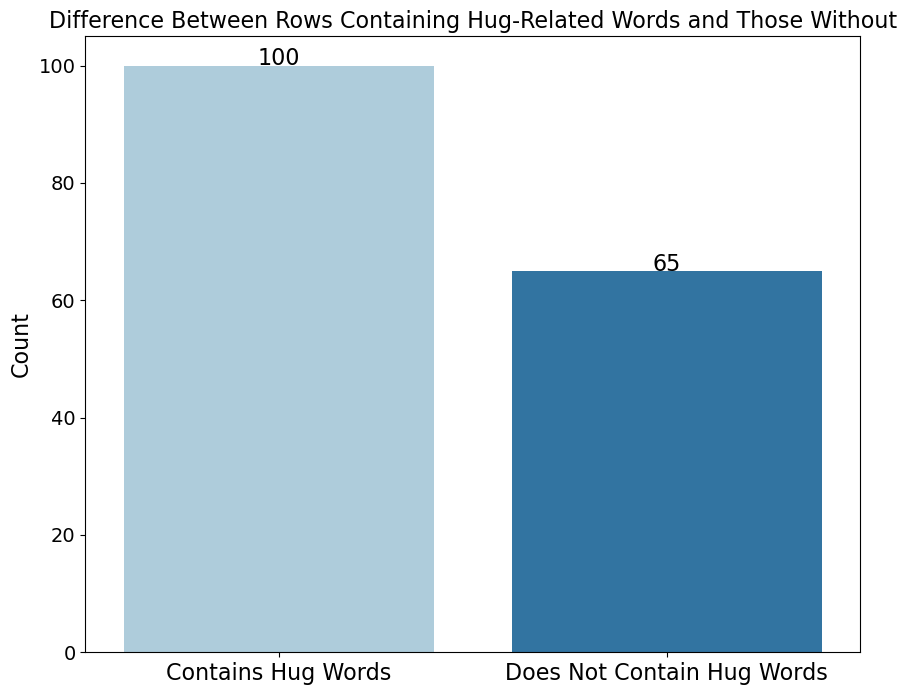

In [146]:
def count_hug_words(column):
    words = ['מחבקת', 'חיבוק', 'לחבק', 'מתחבקות', 'חיבוקים', 'מחבק', 'מחבקים', 'להתחבק', 'מתחבקים']
    return sum(any(word in sentence for word in words) for sentence in column)

def filter_no_hug_words(column):
    words = ['מחבקת', 'חיבוק', 'לחבק', 'מתחבקות', 'חיבוקים', 'מחבק', 'מחבקים', 'להתחבק', 'מתחבקים']
    return [sentence for sentence in column if all(word not in sentence for word in words)]

hug_word_count = count_hug_words(df_oct7['A107'])
filtered_rows_no_hug = len(filter_no_hug_words(df_oct7['A107']))

categories = ['Contains Hug Words', 'Does Not Contain Hug Words']
counts = [hug_word_count, filtered_rows_no_hug]

plt.figure(figsize=(10, 8))
ax = sns.barplot(x=categories, y=counts, palette=custom_palette)
plt.title('Difference Between Rows Containing Hug-Related Words and Those Without', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.yticks(fontsize=14)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

In [147]:
df_oct7['Contains_Hug_Words'] = df_oct7['A107'].apply(lambda x: any(word in x for word in ['מחבקת', 'חיבוק', 'לחבק', 'מתחבקות', 'חיבוקים', 'מחבק', 'מחבקים', 'להתחבק', 'מתחבקים']))

In [37]:

#print(f'Number of rows containing hug-related words: {hug_word_count}')

Number of rows containing hug-related words: 100


In [51]:
df_oct7['Category'] = df_oct7['Contains_Hug_Words'].map({True: 'Contains Hug Words', False: 'Does Not Contain Hug Words'})
df_oct7['Category'] = df_oct7['Category'].fillna('All Data')

In [39]:
#df_subset = df_oct7.loc[:, 'A65':'A70']
#df_subset['Contains_Hug_Words'] = df_oct7['Contains_Hug_Words']
#correlation_matrix = df_subset.corr()

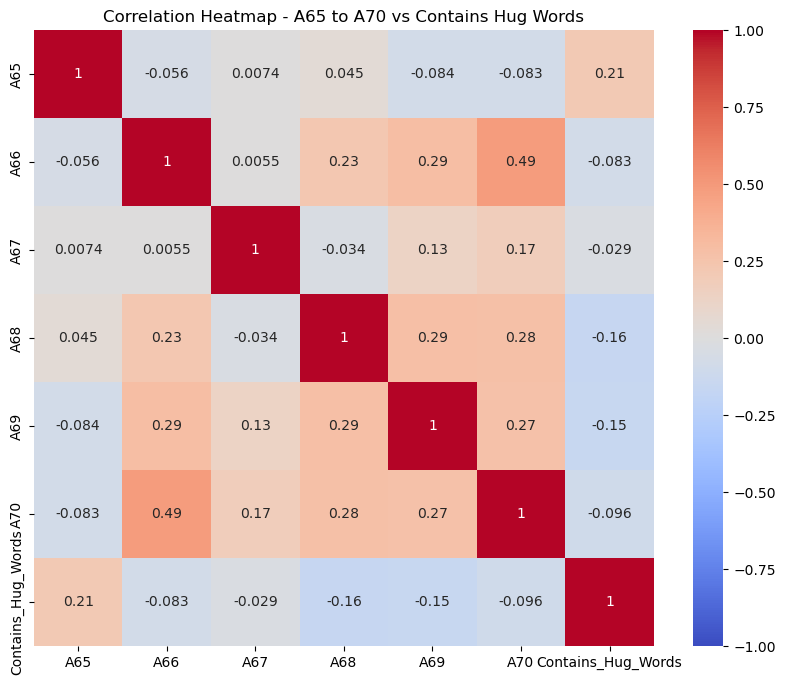

In [40]:
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#plt.title('Correlation Heatmap - A65 to A70 vs Contains Hug Words')
#plt.show()

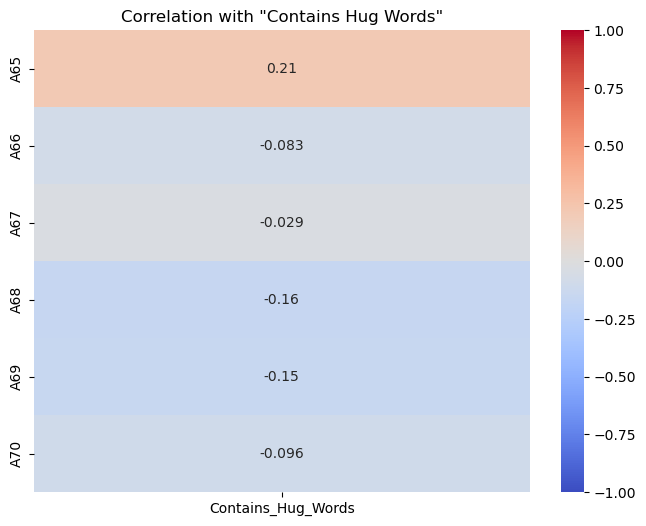

In [41]:
correlation_with_hug_words = correlation_matrix['Contains_Hug_Words'].drop('Contains_Hug_Words')
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_with_hug_words), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with "Contains Hug Words"')
plt.show()

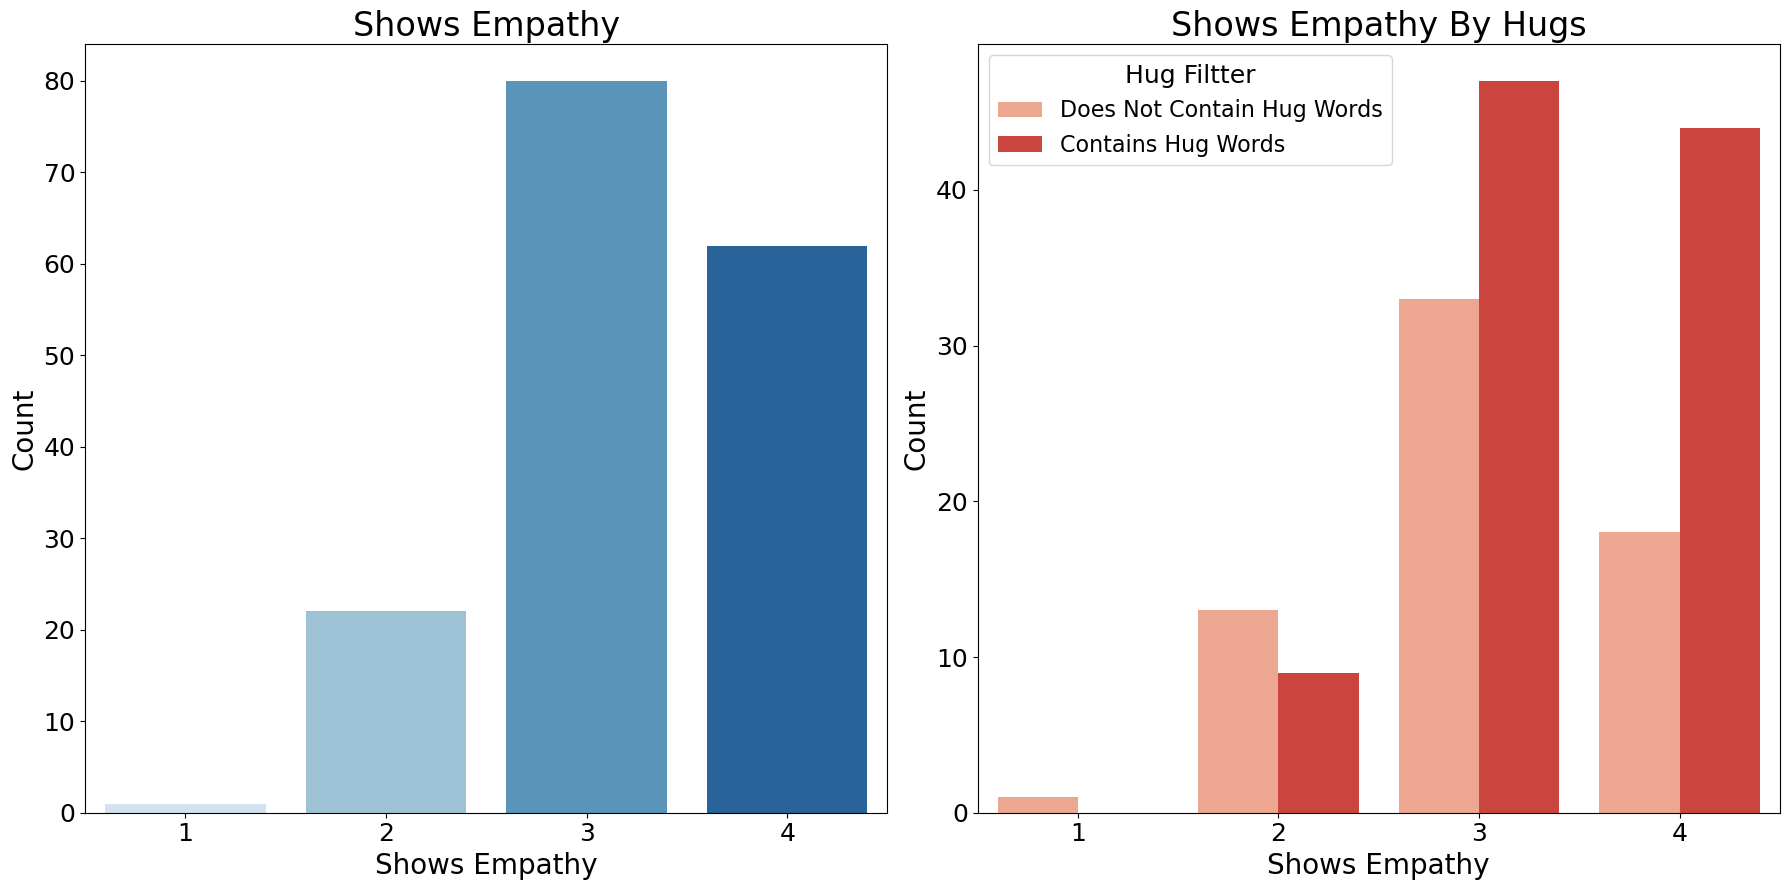

In [42]:
plt.figure(figsize=(18, 9))

plt.subplot(1, 2, 1)
sns.countplot(x='A65', data=df_oct7, palette='Blues')
plt.title('Shows Empathy', fontsize=24)
plt.xlabel('Shows Empathy', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(1, 2, 2)
sns.countplot(x='A65', hue='Category', data=df_oct7, palette='Reds')
plt.title('Shows Empathy By Hugs', fontsize=24)
plt.xlabel('Shows Empathy', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title='Hug Filtter', loc='upper left', fontsize=16, title_fontsize='18')

plt.tight_layout()
plt.show()


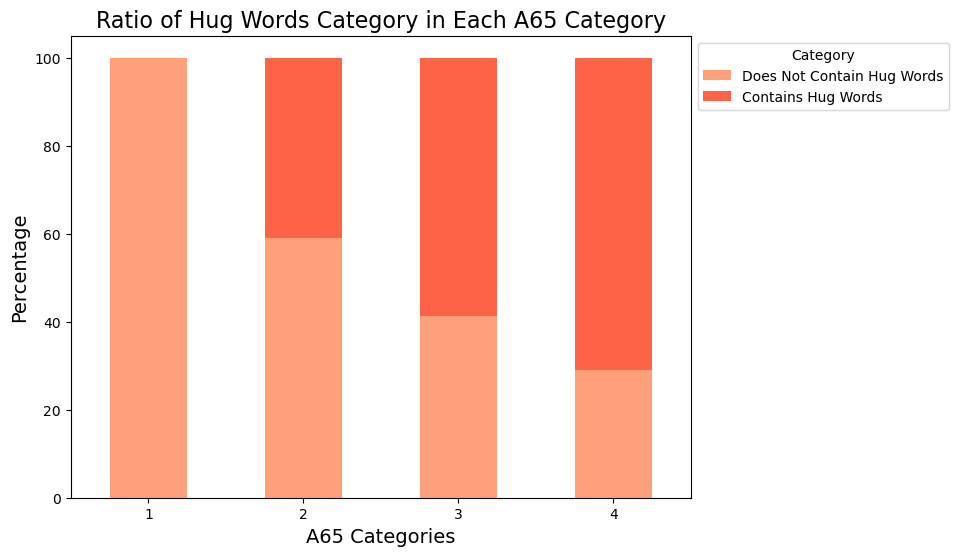

In [43]:
category_counts = df_oct7.groupby(['A65', 'Category']).size().unstack().fillna(0)
category_ratios = category_counts.div(category_counts.sum(axis=1), axis=0) * 100

colors = ['#FFA07A', '#FF6347'] 

category_ratios = category_ratios[['Does Not Contain Hug Words', 'Contains Hug Words']]
category_ratios.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6))
plt.xlabel('A65 Categories', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Ratio of Hug Words Category in Each A65 Category', fontsize=16)
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()


---

<span style = "color: #aa1f25; font-size:15px"> We can assume that hugging children when they are scared or angry will increase their levels of empathy </span>


<hr style="border: 1px solid black;">

# <span style = "color: #aa1f25; font-size:18px"> Conclusion 3: </span>

<img src= "https://github.com/shaked-t/oct7/blob/main/%D7%9E%D7%A1%D7%A7%D7%A0%D7%94%203.jpg?raw=true" width="1200"/>

We wanted to find out what makes children scared of sirens

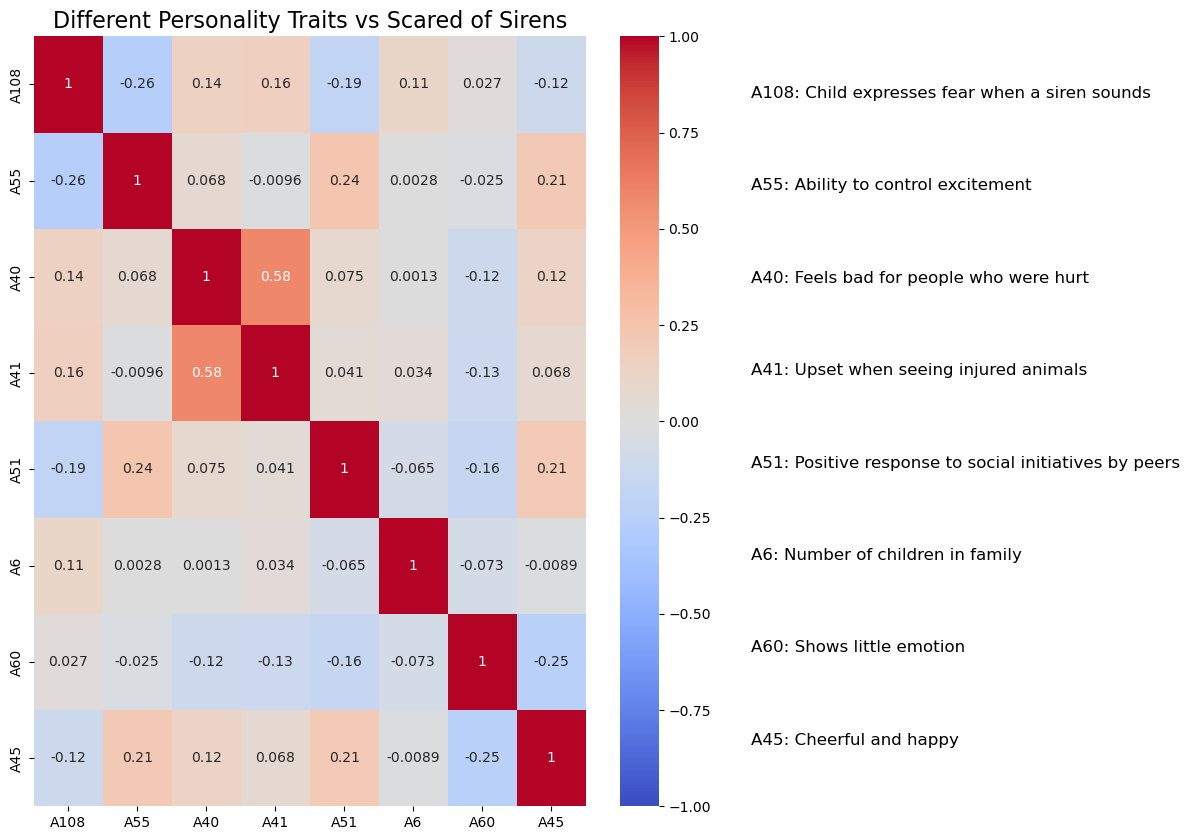

In [135]:
selected_columns = ['A108', 'A55', 'A40', 'A41', 'A51', 'A6', 'A60', 'A45']
correlation_matrix = df_oct7[selected_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Different Personality Traits vs Scared of Sirens', fontsize=16)
descriptions = [
    'A108: Child expresses fear when a siren sounds',
    'A55: Ability to control excitement',
    'A40: Feels bad for people who were hurt',
    'A41: Upset when seeing injured animals',
    'A51: Positive response to social initiatives by peers',
    'A6: Number of children in family',
    'A60: Shows little emotion',
    'A45: Cheerful and happy'
]
plt.subplots_adjust(right=0.7)
for i, desc in enumerate(descriptions):
    plt.text(1.3, 0.92 - i * 0.12, desc, fontsize=12, transform=plt.gca().transAxes)
plt.show()

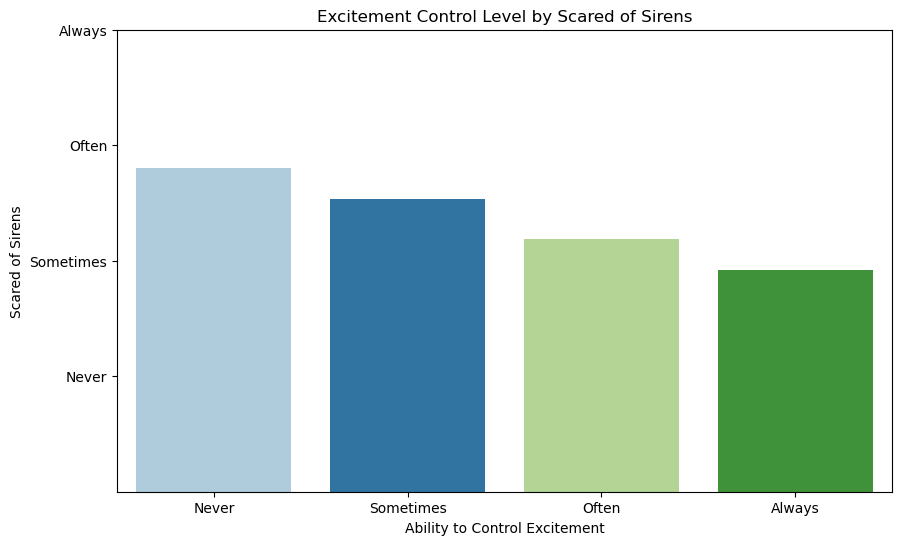

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_oct7, x='A55', y='A108', palette=custom_palette, errorbar=None)
plt.title('Excitement Control Level by Scared of Sirens')
plt.xlabel('Ability to Control Excitement')
plt.ylabel('Scared of Sirens')
plt.xticks([0, 1, 2, 3], ['Never', 'Sometimes', 'Often', 'Always'])
plt.yticks([1, 2, 3, 4], ['Never', 'Sometimes', 'Often', 'Always'])
plt.show()

Children with higher emotional resilience will be less afraid of sirenes

C:\Users\shake\AppData\Local\Temp\ipykernel_25280\1897221157.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_oct7['A108_numeric'] = df_oct7['A108'].map(y_labels)


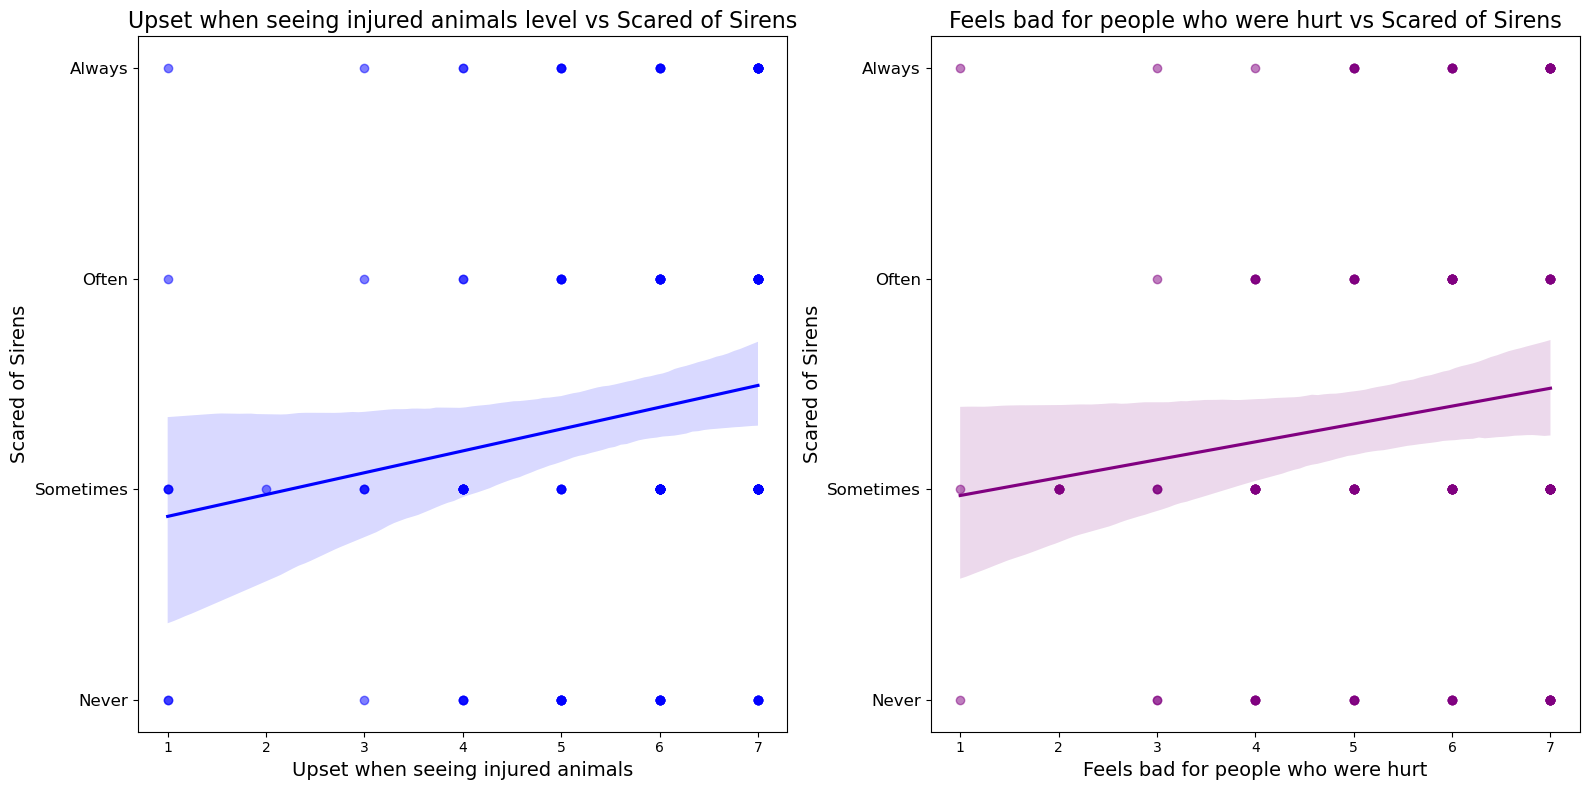

In [45]:
y_labels = {'Never': 1, 'Sometimes': 2, 'Often': 3, 'Always': 4}

df_oct7['A108_numeric'] = df_oct7['A108'].map(y_labels)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.regplot(data=df_oct7, x='A41', y=df_oct7['A108'], color='blue', scatter_kws={'alpha': 0.5})
plt.title('Upset when seeing injured animals level vs Scared of Sirens', fontsize=16)
plt.xlabel('Upset when seeing injured animals', fontsize=14)
plt.ylabel('Scared of Sirens', fontsize=14)
plt.yticks(list(y_labels.values()), list(y_labels.keys()), fontsize=12)

plt.subplot(1, 2, 2)
sns.regplot(data=df_oct7, x='A40', y=df_oct7['A108'], color='purple', scatter_kws={'alpha': 0.5})
plt.title('Feels bad for people who were hurt vs Scared of Sirens', fontsize=16)
plt.xlabel('Feels bad for people who were hurt', fontsize=14)
plt.ylabel('Scared of Sirens', fontsize=14)
plt.yticks(list(y_labels.values()), list(y_labels.keys()), fontsize=12)

plt.tight_layout()
plt.show()

Children who are more sensitive to animals and people are likely to be more afraid of sirens

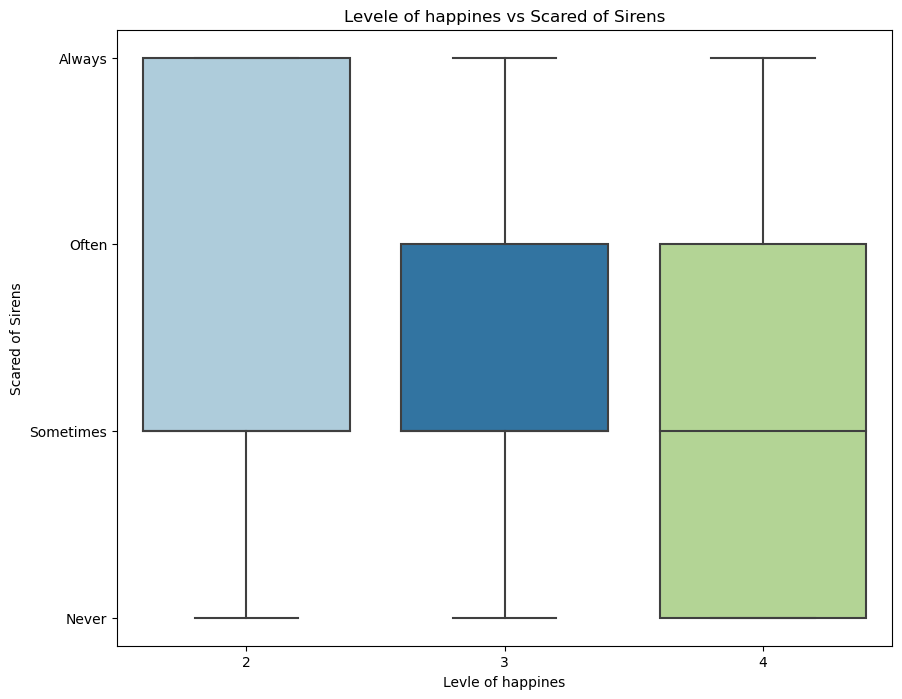

In [46]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_oct7, x='A51', y=df_oct7['A108'], palette=custom_palette)
plt.title('Levele of happines vs Scared of Sirens')
plt.xlabel('Levle of happines')
plt.ylabel('Scared of Sirens')
plt.yticks(list(y_labels.values()), list(y_labels.keys()))
plt.show()

We can see that happier children are less scared of sirens compared to unhappy children

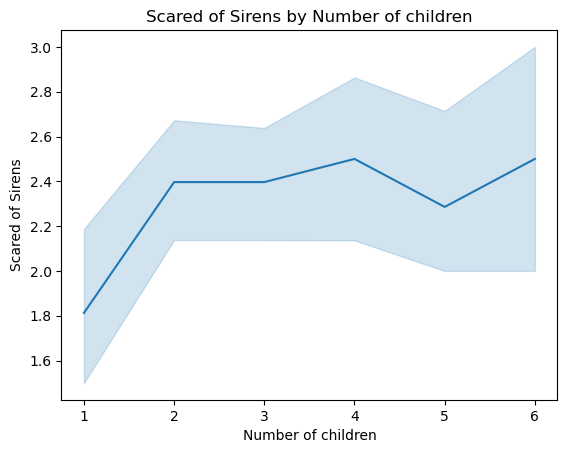

In [47]:
sns.lineplot(data=df_oct7, x= 'A6', y='A108')
plt.title('Scared of Sirens by Number of children')
plt.xlabel('Number of children')
plt.ylabel('Scared of Sirens')
plt.show()

We can see an anusual rise in scare levele for families with 6 children, so we decided to check how many families have 6 children

In [48]:
len(df_oct7[df_oct7['A6']==6])

4

there are only 4 families with 6 children and therefor we can neglect them

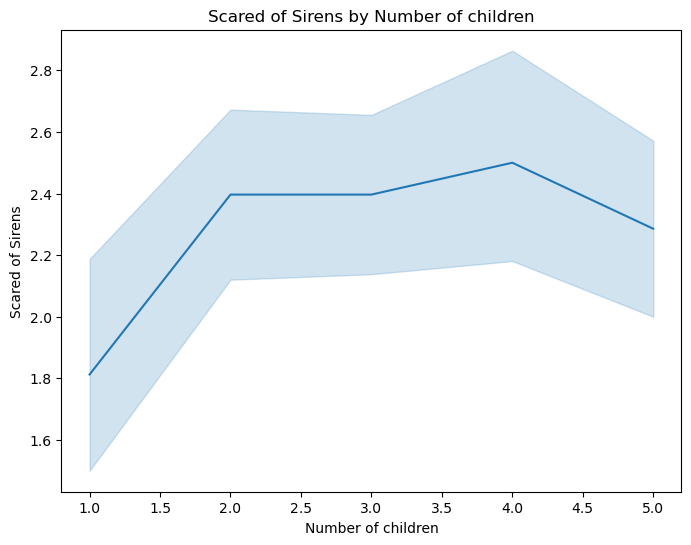

In [49]:
filtered_df = df_oct7[df_oct7['A6'] != 6]
plt.figure(figsize=(8, 6))
sns.lineplot(data=filtered_df, x='A6', y='A108')
plt.title('Scared of Sirens by Number of children')
plt.xlabel('Number of children')
plt.ylabel('Scared of Sirens')
plt.show()

We can see that an only child is less afraid than a child in a family of Two 

---

<span style = "color: #aa1f25; font-size:15px"> In conclusion, we found that a child's resilience level, sensitivity, and the change from one child to two children are factors that affect their fear of sirens</span>

<hr style="border: 1px solid black;">